# IBM HR Analytics Employee Attrition & Performance Project

In [130]:
from IPython.display import Image
Image(url= "https://image.slidesharecdn.com/attrition-120925014826-phpapp01/95/employee-attrition-1-728.jpg?cb=1520244541")

# Introduction
#### The department of HR is one of the toughest teams to be in. Contrary to popular beliefs, HR professionals do not have an easy life and their primary responsibilities do not include only organizing fun activities, team lunches, secret Santa games and more. Just like every other team in an organization, they too have targets and monthly goals to achieve. Apart from that, they are the ones who probably have a perpetually challenging task at the workplace – controlling attrition in HR.
#### In this project my goal is to reduce the employees attrition and try to make company a better place to work.

In [62]:
# import libraries
import numpy as np
from numpy import median
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import random as rn
from functools import reduce 

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [63]:
# Read the file
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [129]:
from IPython.display import Image
Image(url= "https://res.cloudinary.com/people-matters/image/upload/fl_immutable_cache,w_624,h_351,q_auto,f_auto/v1598938394/1598938393.jpg")

In [64]:
# Shape of data
df.shape

(1470, 35)

In [65]:
# checking columns types and null values

pd.set_option('display.max_rows',None)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### I am checking the shape of the data set as there are 1470 rows and 35 columns available in dataset.
#### Almost all of the column are of same data type that are :
#### Attrition, BusinessTravel,Department,EducationField,Gender,Job Role,Marital Status,Over18 and OverTime columns are of categorical data type.
#### I can see that there is no missing values in this dataset.

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=1470, step=1)

In [7]:
df.values

array([[41, 'Yes', 'Travel_Rarely', ..., 4, 0, 5],
       [49, 'No', 'Travel_Frequently', ..., 7, 1, 7],
       [37, 'Yes', 'Travel_Rarely', ..., 0, 0, 0],
       ...,
       [27, 'No', 'Travel_Rarely', ..., 2, 0, 3],
       [49, 'No', 'Travel_Frequently', ..., 6, 0, 8],
       [34, 'No', 'Travel_Rarely', ..., 3, 1, 2]], dtype=object)

In [8]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


#### Above statistics data show that their multiple outliers.There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.¶
#### Also, number of rows in each column are same, means there are no null values in the data set
#### Also, the mean and 50%value of most of the column are same and the STD and mean are having the hugh difference.
#### Most of the column statistics data are near to 0 values that need to be replaced by mean and mode.
#### By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

In [9]:
df['TotalWorkingYears'][df['TotalWorkingYears'] < 0].sum()

0

### There is no negative value in years. It makes sense. 

In [10]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

#### Marital status has really three unique values as shown on chart above. 

In [11]:
df['YearsAtCompany'][df['YearsAtCompany'] > 41].sum() 

0

### I checked if there is a weird number for 'YearsAtCompany'. At most, one should have 40 years in a company. So, evertyhing seems goood. 

In [12]:
# Check for duplicate observations
df.duplicated().sum()

0

### With the help of duplicate command i have checked there are no duplicates data in dataset.

In [13]:
# Reassign response variable
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [14]:
# Inspect useless features
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [15]:
# Drop useless features and rename the dataframe
df2 = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

In [16]:
# Moving Response Variable to the last column
front = df2['Attrition']
df2.drop(labels=['Attrition'], axis=1,inplace=True)
df2.insert(31,'Attrition',front)
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,0


In [17]:
# Changing object types to categories
cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in cols:
    df2[col] = df2[col].astype('category')

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   BusinessTravel            1470 non-null   category
 2   DailyRate                 1470 non-null   int64   
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   int64   
 6   EducationField            1470 non-null   category
 7   EmployeeNumber            1470 non-null   int64   
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   catego

**Inspect values of categorical columns**

In [19]:
df2[cols].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [20]:
for col in cols:
    display(df2[col].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64

### From the above coding i am Inspecting values of categorical columns

# Exploratory Data Analysis

We have 32 features consisting of both categorical as well as the numerical features. Response variable is 'Attrition' of the employees which can 1 and 0 (representing 'Yes' and 'No' respectively). This is what we will predict.  

Now, I will try to analyze visually the trends in how and why employees are quitting their jobs. For that, I will deep dive into the details about features and their relationships between each other.

### Target Variable:

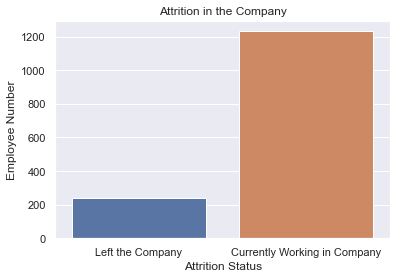

Currently Working in Company    1233
Left the Company                 237
Name: Attrition, dtype: int64

In [21]:
trgt = df2['Attrition'].apply(lambda x: 'Currently Working in Company' if x == 0 else 'Left the Company')
sns.countplot(trgt)
plt.title('Attrition in the Company')
plt.xlabel('Attrition Status')
plt.ylabel('Employee Number')
plt.show()
trgt.value_counts()

### In the company, there are 1470 employees. 237 employees who compose 16% of the total number of employee left the company for some reasons. Besides that, 1233 employee is currently continuing to work in the same company.
### Since it is the imbalanced data so i will be using upsampling for better model building soon.

### Features: 

First of all, I will code two functions to implement dataframe and graph on each feature of the dataset. 

In [22]:
# Create Feature Dataframe
def table_df(x): 
    """
    This function creates dataframe for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee ', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    feature['% of Attrition in the Company'] = (feature['Attrition Number'] / 237)*100
        
    return feature

In [23]:
# Create graph for each feature to compare its attrition in the company 

def graph_df(x, y = 'bar', z = 0):
    """
    This function creates graph for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    
    fig0, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    feature.set_index(feature[x], drop=True, inplace=True)
    feature['Total Employee'].plot(kind = y, stacked = True, ax = ax1, 
                                   colormap = 'winter', rot = z)
    feature['% of Attrition in the Relevant Group'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')
    plt.title('Attrition compared to' + " " + x  + " " + "Groups")
    ax1.set_xlabel(x)
    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("Total Employee")
    ax2.set_ylabel("Attrition Percentage in the Relevant Group")
    ax2.yaxis.label.set_color('red')
    plt.tight_layout()
    plt.show()

## Age

In [24]:
# Labeling age groups
table_df(x = 'Age')
bins = [17, 21, 25, 35, 60]
group_names = ['(18-21)', '(22-25)', '(26-35)', '(36-60)']
df2['Age'] = pd.cut(df2['Age'], bins, labels = group_names)

In [25]:
# Age Group & Attrition Table
table_df(x = 'Age')

,Age,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,(18-21),41,22,53.658537,9.282700
1,(22-25),82,22,26.829268,9.282700
2,(26-35),606,116,19.141914,48.945148
3,(36-60),741,77,10.391363,32.489451


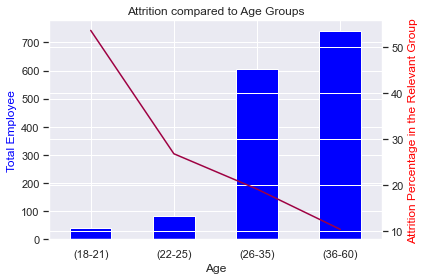

In [26]:
# Attrition Compared to Age Group Graph
graph_df(x = 'Age')

In **18-21 age group**, young employees are more likely to leave the company. Their attrition proportion to their age group is approximately 53.7% (22 out of 41) and that makes up 9% of all attrition (22 out of 237). 

If we evaluate overall attrition number in the company,  **26-35 age group's attrition number** is the highest comparing to other age groups. In this age group, we have 19.1 % of employee attrition(116 out 606). That makes up approximately 49% of all attrition in the company (116 out of 237). 

**35-60 age group** generally prefers to secure their job in the same company.

## Business Travel

In [27]:
# Business Travel
df2.BusinessTravel.value_counts(normalize=True)

Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64

<AxesSubplot:>

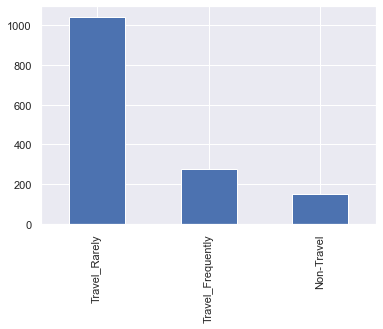

In [28]:
df2['BusinessTravel'].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='BusinessTravel'>

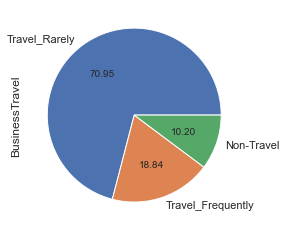

In [29]:
df2['BusinessTravel'].value_counts().plot(kind="pie",autopct='%.2f')

#### In the company, most of the employee travel rarely or Non-travel according to their job description
#### From the above box and pie plot I can say that the highest attrition rate (70.95%) is for those employees who travel Rarely.
#### Employees who is a Non-travel in their current role have the lowest attrition rate(10.20%) in th company.

## Department

In [27]:
# Department 
df2.Department.value_counts(normalize=True)

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64

<AxesSubplot:>

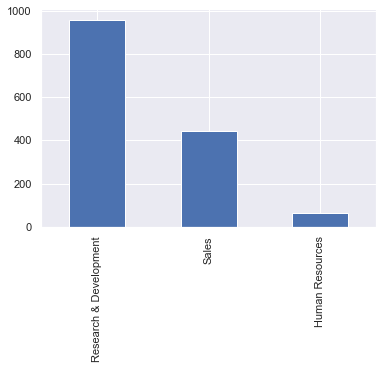

In [28]:
df2['Department'].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Department'>

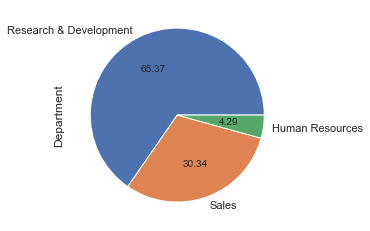

In [29]:
df2['Department'].value_counts().plot(kind="pie",autopct='%.2f')

#### There are three departments in the company.(Research & Development,Sales,Human Resources)
#### From the above box and pie plot I can say that Research & Development Department has the most attrition rate(65.37%) in the company.
#### Human Resources Department which got least effected in terms of attrition rate(4.29%)

## Distance From Home

In [30]:
# Labeling Distance From Home Groups
table_df(x = 'DistanceFromHome')
bins = [0, 3, 6, 10, 29]
group_names = ['1-3', '4-6', '7-10', '10+']
df2['DistanceFromHome'] = pd.cut(df2['DistanceFromHome'], bins, labels = group_names)

In [31]:
# Distance From Home Group & Attrition Table
table_df(x = 'DistanceFromHome')

,DistanceFromHome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1-3,503,68,13.518887,28.691983
1,4-6,188,26,13.829787,10.970464
2,7-10,335,50,14.925373,21.097046
3,10+,444,93,20.945946,39.240506


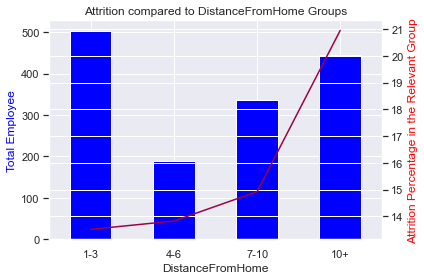

In [32]:
# Attrition compared to Distance From Home Graph
graph_df(x = 'DistanceFromHome')

#### Employees whose homes are 1-3 miles far away from the company compose approximately 1/3 of the whole company employee and their attrition rate is 28.7% of all company (68 out of 237).
#### Also, employees whose homes are 10+ miles far away from the company compose approximately the other 1/3 of the whole company employee and their attrition rate is 39.2% of all company (93 out of 237)
#### Attrition rate within its own distance group seems to increase as the distance from home increases.

## Education

In [33]:
df2.Education.value_counts(normalize=True)

3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: Education, dtype: float64

<AxesSubplot:>

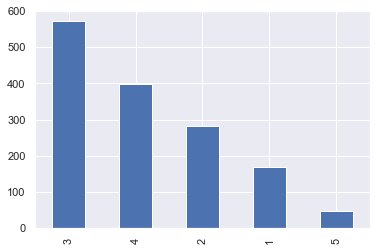

In [34]:
# Education Level
df2['Education'].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Education'>

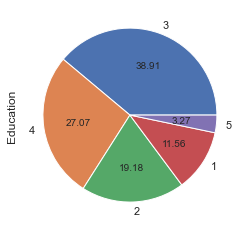

In [35]:
df2['Education'].value_counts().plot(kind="pie",autopct='%.2f')

#### Employees who have bachelor degree have the most attrition number (99 employees) in the company. That makes up 41.8% of all attrition in the company. Employees who have Ph.D. degree composes the least attrition number in the company.

#### Employees who have the master, college, and below college degrees are follower of employees who have bachelor degrees in terms of the attrition number in the company respectively.

## Education Field

In [36]:
# Education Field
df2.EducationField.value_counts(normalize=True)

Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64

<AxesSubplot:>

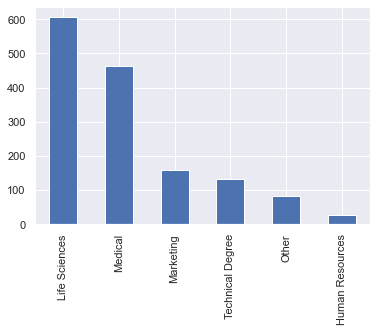

In [37]:
# Attrition compared to Education Field Graph
df2['EducationField'].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='EducationField'>

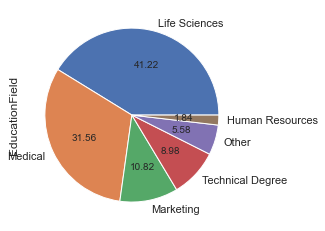

In [38]:
df2['EducationField'].value_counts().plot(kind="pie",autopct='%.2f')

#### From the above Box & Pie plots I can analyze five EducationFeild in the company.
#### Employees who have Life Science education level have the most attrition number which makes up the 41.22% of attrition rate in the company.
#### Besides that, Human Resources has the least attrition rate (1.84%) in the company.

## Environment Satisfaction

In [39]:
# Labeling environment satisfaction
df2.EnvironmentSatisfaction.value_counts(normalize=True)

3    0.308163
4    0.303401
2    0.195238
1    0.193197
Name: EnvironmentSatisfaction, dtype: float64

<AxesSubplot:>

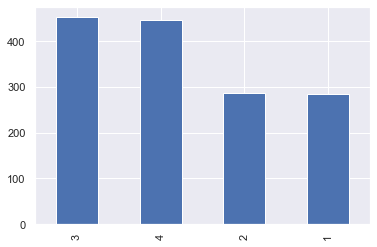

In [40]:
df2['EnvironmentSatisfaction'].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='EnvironmentSatisfaction'>

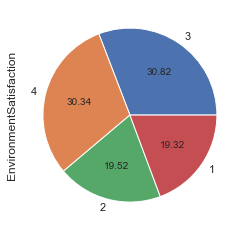

In [41]:
df2['EnvironmentSatisfaction'].value_counts().plot(kind="pie",autopct='%.2f')

#### 1 - Low
#### 2 - Medium
#### 3 - High
#### 4 - Very High
#### As it may be expected, there is a high attrition rate(30.82%) in the low satisfaction environment.
#### Besides that,Low has the least attrition rate (19.32%) in the company.
#### This result might tell us that environment satisfaction is not the one of the main reasons for attrition in the company.

## Gender

In [42]:
# Gender & Attrition Table
table_df(x = 'Gender')

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


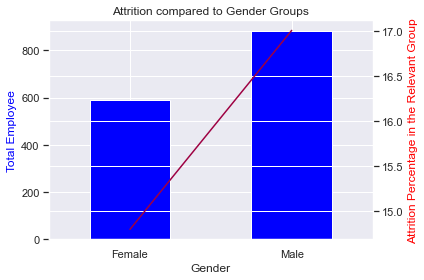

In [43]:
# Attrition compared to Gender Graph
graph_df(x = 'Gender')

#### Male employees are more likely to leave the company than female employees.

## Job Involvement

In [44]:
# Labeling Job Involvement Groups
df2.JobInvolvement.value_counts(normalize=True)

3    0.590476
2    0.255102
4    0.097959
1    0.056463
Name: JobInvolvement, dtype: float64

<AxesSubplot:>

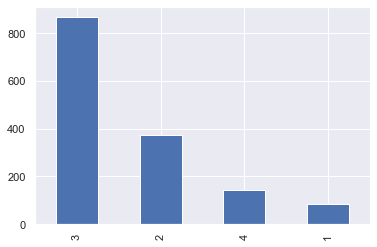

In [45]:
df2['JobInvolvement'].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='JobInvolvement'>

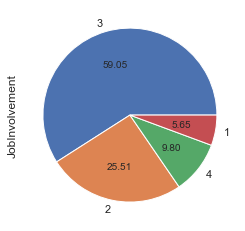

In [46]:
df2['JobInvolvement'].value_counts().plot(kind="pie",autopct='%.2f')

#### 1 - Low
#### 2 - Medium
#### 3- High
#### 4 - Very High
#### High job involvement category has the highest employee leaving proportion within individual category when it is compared to the other categories with 59.05% attrition Rate.
#### Low job involvement category has the highest employee leaving proportion within individual category when it is compared to the other categories. 5.65% of Low Job involvement group left the company.

## Job Level

In [47]:
# Labeling job levels
df2.JobLevel.value_counts(normalize=True)

1    0.369388
2    0.363265
3    0.148299
4    0.072109
5    0.046939
Name: JobLevel, dtype: float64

<AxesSubplot:>

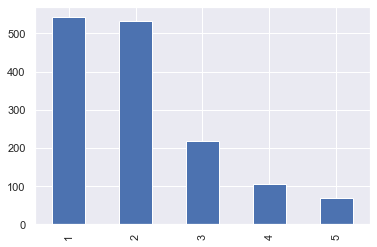

In [48]:
df2['JobLevel'].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='JobLevel'>

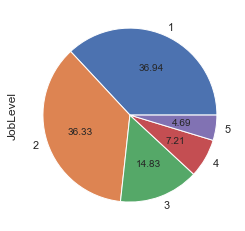

In [49]:
df2['JobLevel'].value_counts().plot(kind="pie",autopct='%.2f')

#### 1 - Level-1
#### 2 - Level-2
####  3 - Level-3
#### 4 - Level-4
#### 5 - Level-5
#### With an increase in job level, there is a decrease in attrition number throughout the company.
#### The highest attrition is observed in the job level-1, who compose the 36.94% of all attrition, left the company.
#### The lowest attrition is observed in Level - 5 with 4.69% attrition rate stays in the company.

## Job Role

In [50]:
# Job Role 
df2.JobRole.value_counts(normalize=True)

Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: JobRole, dtype: float64

<AxesSubplot:>

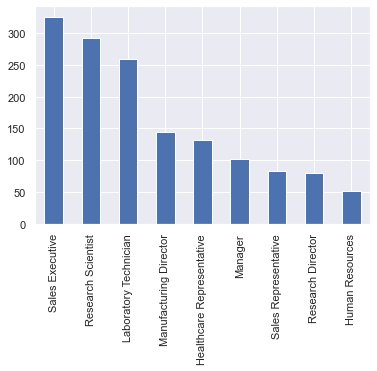

In [51]:
df2['JobRole'].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='JobRole'>

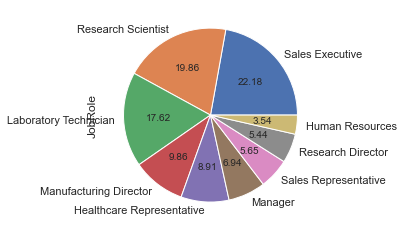

In [52]:
df2['JobRole'].value_counts().plot(kind="pie",autopct='%.2f')

#### Sales Executive Job role has been affected mostly by the attrition with 22.18%.
#### On the other hand, Human Resources Job role has the lowest attrition number in the company(3.54%).

## Job Satisfaction

In [30]:
# Labeling Job Role 
df2.JobSatisfaction.value_counts(normalize=True)                                             

4    0.312245
3    0.300680
1    0.196599
2    0.190476
Name: JobSatisfaction, dtype: float64

<AxesSubplot:>

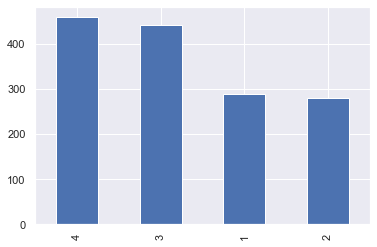

In [31]:
df2['JobSatisfaction'].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='JobSatisfaction'>

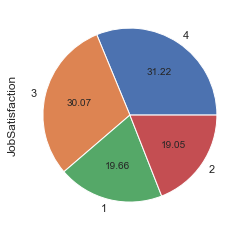

In [33]:
df2['JobSatisfaction'].value_counts().plot(kind="pie",autopct='%.2f')

#### 4 - High Job Satisfaction
#### 2 - Low Job Satisfaction

#### In **high** job satisfaction, surprisingly employees leave the company most and their attrition composes 31.22% of company's attrition. From this picture, I assume that job satisfaction should not be the main reason for employees to leave the company. 

#### As it may be expected, in **low** job satisfaction, employees leave the company more than other groups except **high** satisfaction. They compose 19.05% of all attrition in the company. 

## Marital Status

In [35]:
df2.MaritalStatus.value_counts(normalize=True)

Married     0.457823
Single      0.319728
Divorced    0.222449
Name: MaritalStatus, dtype: float64

<AxesSubplot:>

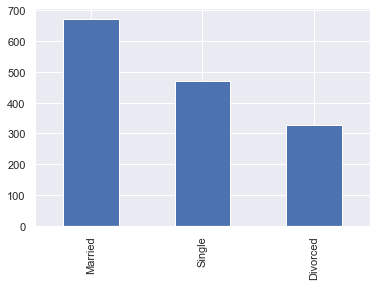

In [36]:
df2['MaritalStatus'].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='MaritalStatus'>

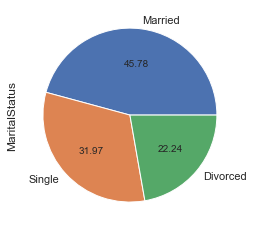

In [37]:
df2['MaritalStatus'].value_counts().plot(kind="pie",autopct='%.2f')

### Married employees are more likely to leave the company. 
### Single and Divorced employees are the followers of **Single** employees in the attrition number of the company respectively. 

## Monthly Income

In [61]:
# Labeling Monthly Income Level
table_df(x = "MonthlyIncome")
bins = [1000, 2000, 3000, 4000, 5000, 7500, 9000, 11000, 15000, 20000]
group_names = ['1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-7500', 
               '7500-9000', '9000-11000', '11000-15000', '15000-20000']             
df2["MonthlyIncome"] = pd.cut(df2["MonthlyIncome"], bins, labels = group_names)

In [62]:
# Monthly Income & Attrition Table
table_df(x = "MonthlyIncome")

,MonthlyIncome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1000-2000,33,18,54.545455,7.594937
1,2000-3000,362,95,26.243094,40.084388
2,3000-4000,148,24,16.216216,10.126582
3,4000-5000,206,26,12.621359,10.970464
4,5000-7500,310,30,9.677419,12.658228
5,7500-9000,78,10,12.820513,4.219409
6,9000-11000,118,22,18.644068,9.282700
7,11000-15000,82,7,8.536585,2.953586
8,15000-20000,133,5,3.759398,2.109705


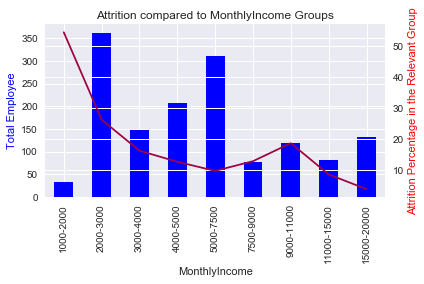

In [63]:
# Attrition compared to Monthly Income Level Graph
graph_df(x = "MonthlyIncome", z = 90)

**2000-3000 dollars monthly income** level, there is a high  attrition and it compose the 40% of attrition in the company. 

**1000-2000 dollars monthly income** level, there is a high  attrition in its own income group level, which is 54.5%. 

As the monthly income increase, it is observed that there is a decrease in attrition. But, in **9000-11000 dollars monthly income** level, there is a rise in  attrition of its own monthly income group level. 

## Num Companies Worked

In [64]:
# Labeling Numbers Companied Worked Groups
table_df(x = 'NumCompaniesWorked')
bins = [0, 1, 2, 3, 4, 5, 10]
group_names = ['0', '1', '2', '3', '4', '5+']             
df2['NumCompaniesWorked'] = pd.cut(df2['NumCompaniesWorked'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

In [65]:
# Numbers Companied Worked & Attrition Table
table_df(x = 'NumCompaniesWorked')

,NumCompaniesWorked,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,197,23,11.675127,9.704641
1,1,521,98,18.809981,41.350211
2,2,146,16,10.958904,6.751055
3,3,159,16,10.062893,6.751055
4,4,139,17,12.230216,7.172996
5,5+,308,67,21.753247,28.270042


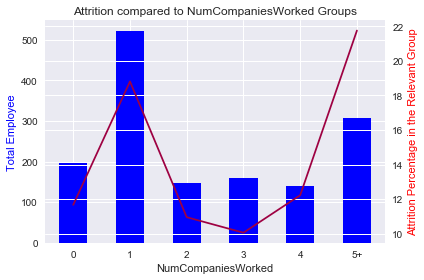

In [66]:
# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'NumCompaniesWorked')

If employees have **one company experience** before current company, they are more likely to leave the company. They have the highest attrition number and compose of 41.3% all attrition in the company. Besides, if **employees don't have any experience** in other company, they have the second most attrition number.  

Also, employees, who has more experience such as **working in 5,6,7, and 9 companies** before the current company, have the highest attrition in their individual experienced group. 

## Over Time

In [67]:
# Numbers Companied Worked & Attrition Table
table_df(x = 'OverTime')

,OverTime,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,No,1054,110,10.436433,46.413502
1,Yes,416,127,30.528846,53.586498


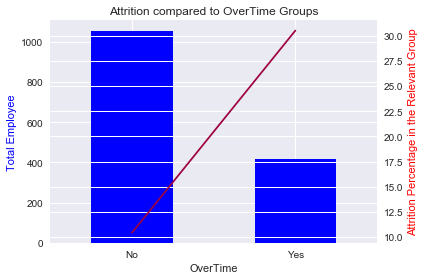

In [68]:
# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'OverTime')

28.3% of employees have the over time work in the company and they have higher attrition number than employees who don't have. There is not a significant difference between these two groups' attrition number. But if you compare individually both groups, over time employees are much more likely to leave the company.

## Percent Salary Hike

In [69]:
# Percent Salary Hike & Attrition Table
table_df(x = 'PercentSalaryHike')
bins = [10, 14, 18, 22, 25]
group_names = ['11-14', '15-18', '19-22', '23-25']             
df2['PercentSalaryHike'] = pd.cut(df2['PercentSalaryHike'], bins, labels = group_names)

In [70]:
# Percent Salary Hike & Attrition Table
table_df(x = 'PercentSalaryHike')

,PercentSalaryHike,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,11-14,818,132,16.136919,55.696203
1,15-18,350,59,16.857143,24.894515
2,19-22,235,33,14.042553,13.924051
3,23-25,67,13,19.402985,5.485232


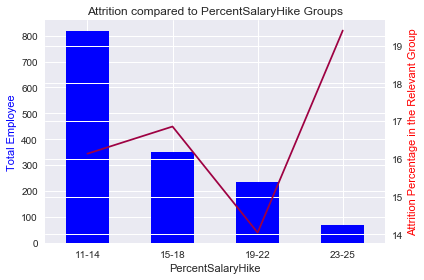

In [71]:
# Attrition compared to Percent Salary Hike
graph_df(x = 'PercentSalaryHike')

As it may be expected, the higher percent salary hike is, the more employees are likely and willingly to stay in the current company. The employees who have the highest percent salary hikes are more likely to leave the company. The reason for that might be due to the fact that they are more qualified and have the chance to find better position in other companies or due to the retirement. 

## Performance Rating

In [72]:
# Performance Rating & Attrition Table
table_df(x = 'PerformanceRating')

,PerformanceRating,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,3,1244,200,16.077170,84.388186
1,4,226,37,16.371681,15.611814


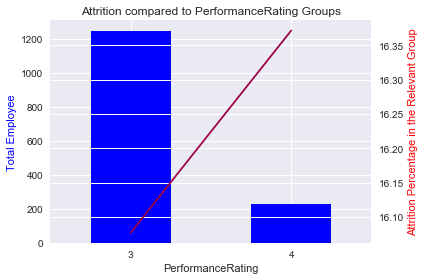

In [73]:
# Attrition compared to Performance Rating
graph_df(x = 'PerformanceRating')

Performance rating has two category such as 3 and 4. 84.6% of employees are in the **performance rating 3 group** and 16.08 attrition. The rest of the employees are in **performance rating 4 group** and their attrition percentage(%16.37) is a little bit higher than previous group. 

## Relationship Satisfaction

In [74]:
# Labeling Relationship Satisfaction Levels
table_df(x = 'RelationshipSatisfaction')
df2['RelationshipSatisfaction'] = df2['RelationshipSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                       3:'High', 4:'Very High'})

In [75]:
# Relationship & Attrition Table
table_df(x = 'RelationshipSatisfaction')

,RelationshipSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,459,71,15.468410,29.957806
1,Low,276,57,20.652174,24.050633
2,Medium,303,45,14.851485,18.987342
3,Very High,432,64,14.814815,27.004219


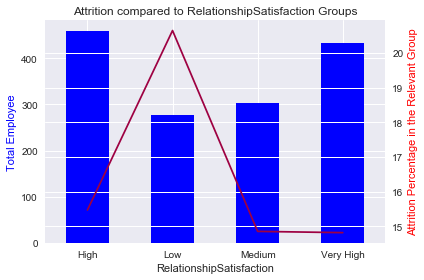

In [76]:
# Attrition compared to Relationship Satisfaction Graph
graph_df(x = 'RelationshipSatisfaction')

Relationship satisfaction is aligned with high and very high in the company. But, still **High** and **very high** relationship satisfaction level have the most attrition number respectively and compose of 52.7% all attrition in the company. 

Besides that, the highest attrition percentage in the satisfaction group is **low** as it might be expected (20.7% of attrition in the low relationship satisfaction level. 

## Stock Option Level

In [77]:
# Relationship & Attrition Table
table_df(x = 'StockOptionLevel')

,StockOptionLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,631,154,24.405705,64.978903
1,1,596,56,9.395973,23.628692
2,2,158,12,7.594937,5.063291
3,3,85,15,17.647059,6.329114


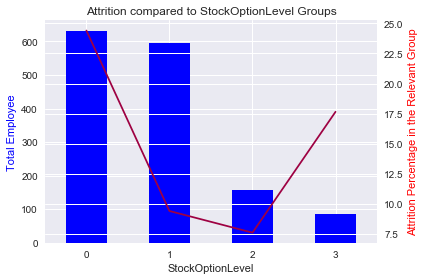

In [78]:
# Attrition compared to Stock Option Level Graph
graph_df(x = 'StockOptionLevel')

If **stock option level** is 0, there occurs a huge attrition in the company and it composes the 65% of the all attrition in the company. Besides, as the stock option level increase, there is a decrease in attrition number. 

## Total Working Years

In [79]:
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')
bins = [0, 1, 5, 10, 15, 20, 40]
group_names = ['1', '2-5', '6-10', '11-15', '16-20', '20+']             
df2['TotalWorkingYears'] = pd.cut(df2['TotalWorkingYears'], bins, labels = group_names, 
                                  include_lowest = True)

In [80]:
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')

,TotalWorkingYears,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,92,45,48.913043,18.987342
1,2-5,224,46,20.535714,19.409283
2,6-10,607,91,14.991763,38.396624
3,11-15,191,24,12.565445,10.126582
4,16-20,149,15,10.067114,6.329114
5,20+,207,16,7.729469,6.751055


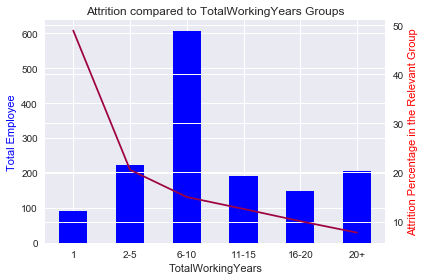

In [81]:
graph_df(x = 'TotalWorkingYears')

**Employees who have one year or less working experience** are more likely to leave the company and compose the 18.98% of all attrition throughout the company. In addition to that, **employees who have 6-10 years' experience** have also second highest attrition percentage throughout the company and it compose the 38.4% of all attrition. 

## Training Times Last Year

In [82]:
# Training Times Last Year & Attrition Table
table_df(x = 'TrainingTimesLastYear')

,TrainingTimesLastYear,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,54,15,27.777778,6.329114
1,1,71,9,12.676056,3.797468
2,2,547,98,17.915905,41.350211
3,3,491,69,14.052953,29.113924
4,4,123,26,21.138211,10.970464
5,5,119,14,11.764706,5.907173
6,6,65,6,9.230769,2.531646


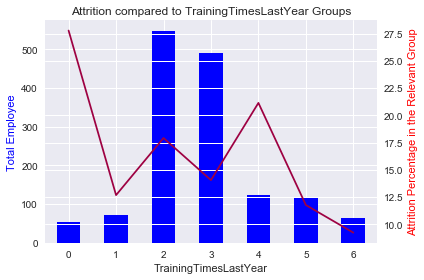

In [83]:
# Attrition compared to Training Times Last Year Graph
graph_df(x = 'TrainingTimesLastYear')

Employees who has **2 and 3 times training last year** has the most attrition number respectively and both of their attrition compose the 70.5% of all attrition in the company. Employees who don't have training time beforehand has the highest attrition number in its individual group. 

## Work Life Balance

In [84]:
# Labeling Work Life Balance Groups
table_df(x = 'WorkLifeBalance')
df2['WorkLifeBalance'] = df2['WorkLifeBalance'].map({1:'Bad', 2:'Good', 
                                                     3:'Better', 4:'Best'})

In [85]:
# Work Life Balance & Attrition Table
table_df(x = 'WorkLifeBalance')

,WorkLifeBalance,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bad,80,25,31.250000,10.548523
1,Best,153,27,17.647059,11.392405
2,Better,893,127,14.221725,53.586498
3,Good,344,58,16.860465,24.472574


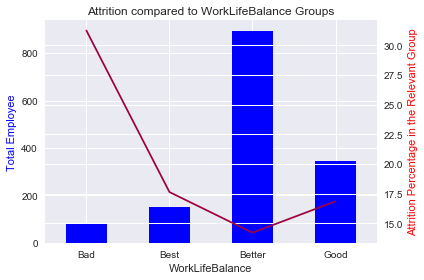

In [86]:
# Attrition compared to Work Life Balance Graph
graph_df(x = 'WorkLifeBalance')

In general, work life balance is satisfactorily good throughout the company. But we have the highest attrition number and percentage throughout the company. 

Besides, bad work life balance group has highest attrition percentage in its individual group. 

## Years at Company

In [87]:
# Labeling Years at Company Groups
table_df(x = 'YearsAtCompany')
bins = [0, 1, 5, 10, 40]
group_names = ['1', '2-5', '6-10', '10+']             
df2['YearsAtCompany'] = pd.cut(df2['YearsAtCompany'], bins, labels = group_names, 
                               include_lowest = True)

In [88]:
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


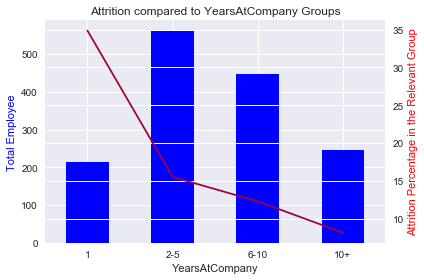

In [89]:
# Years at Company & Attrition Graph 
graph_df(x = 'YearsAtCompany')

Employees who have one year or less working experience in the company has the highest attrition percentage in its individual experience group (34.9% of attrition in the relevant group). Besides that, highest attrition number, which is 87 employees, is in the 2-5 years working experience at the company and that composes of the 36.7 % of all attrition in the company. 

## Years in Current Role

In [90]:
# Labeling Years in Current Role Groups
table_df(x = 'YearsInCurrentRole')
bins = [0, 1, 4, 6, 7, 10, 18]
group_names = ['1', '2-4', '5-6', '7', '8-10', '10+']             
df2['YearsInCurrentRole'] = pd.cut(df2['YearsInCurrentRole'], bins, labels = group_names, 
                                   include_lowest = True)

In [91]:
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


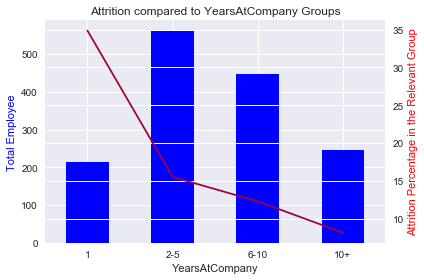

In [92]:
# Years in Current Role & Attrition Graph 
graph_df(x = 'YearsAtCompany')

Employees who don't fulfill their first year and in their first year in their current role are more likely to leave the company. That might be result of challenge or not satisfied with the current role. 

Employees who have 2-5 years' experience in that company compose of the maximum attrition percentage and number in the company. 

Besides that, after years in current role, employees are willing to leave the company. That might be result of looking for better opportunities in other companies. 

## Years Since Last Promotion

In [93]:
# Labeling Years in Current Role Groups
table_df(x = 'YearsSinceLastPromotion')
bins = [0, 1, 2, 3, 4, 7, 8, 16]
group_names = ['0', '1', '2', '3', '4-6', '7', '8+']             
df2['YearsSinceLastPromotion'] = pd.cut(df2['YearsSinceLastPromotion'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

In [94]:
# Years Since Last Promotion & Attrition Table
table_df(x = 'YearsSinceLastPromotion')

,YearsSinceLastPromotion,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,581,110,18.932874,46.413502
1,1,357,49,13.725490,20.675105
2,2,159,27,16.981132,11.392405
3,3,52,9,17.307692,3.797468
4,4-6,138,13,9.420290,5.485232
5,7,76,16,21.052632,6.751055
6,8+,107,13,12.149533,5.485232


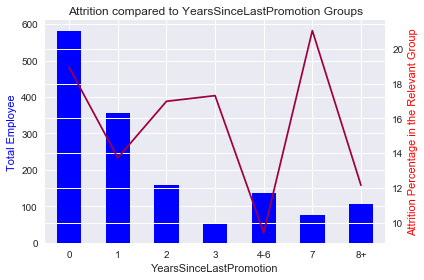

In [95]:
# Years Since Last Promotion & Attrition Graph
graph_df(x = 'YearsSinceLastPromotion')

Employees who don't fulfill his one year since the last promotion in the company are more likely to leave the company(46.4% of all attrition). And employees who have one and two years experience in the current company since the last promotion have the highest attrition number after the above group in the company respectively. 7 years since last promotion has the highest attrition in its individual group.

## Years with Current Manager

In [96]:
# Labeling Years with Current Manager Groups
table_df(x = 'YearsWithCurrManager')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18]
group_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']             
df2['YearsWithCurrManager'] = pd.cut(df2['YearsWithCurrManager'], bins, labels = group_names, 
                                     include_lowest = True, right = False)

In [97]:
# Years with Current Manager & Attrition Table
table_df(x = 'YearsWithCurrManager')

,YearsWithCurrManager,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,263,85,32.319392,35.864979
1,1,76,11,14.473684,4.641350
2,2,344,50,14.534884,21.097046
3,3,142,19,13.380282,8.016878
4,4,98,11,11.224490,4.641350
5,5,31,4,12.903226,1.687764
6,6,29,4,13.793103,1.687764
7,7,216,31,14.351852,13.080169
8,8,107,10,9.345794,4.219409
9,9,64,6,9.375000,2.531646


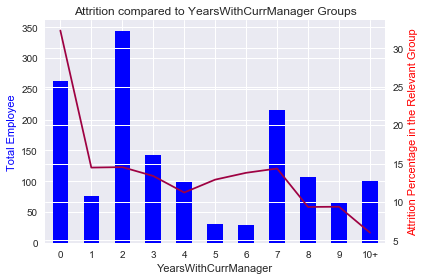

In [98]:
# Years with Current Manager & Attrition Graph
graph_df(x = 'YearsWithCurrManager')

Most of the employee quit the company before completing their first year with their current manager. Other group who leaves the company most is the ones who work two years with current manager.

**Other Features**

I also checked the 'Employee Number', 'Daily Rate', 'Hourly Rate' and 'Monthly Rate' features as I did the in previous features of dataset. But there is nothing significant to comment or visualize about these features. For that reason, I didn't include them in my notebook.

### Feature/Variable Relationships:

Here we will take a look at how variables related to each other. There are various methods/visualizations for this. I will use correlation matrix (heat map) for this purpose. 

`Correlation means association - more precisely it is a measure of the extent to which two variables are related. There are three possible results of a correlational study: a positive correlation, a negative correlation, and no correlation.
A positive correlation is a relationship between two variables in which both variables either increase or decrease at the same time. An example would be height and weight. Taller people tend to be heavier.
A negative correlation is a relationship between two variables in which an increase in one variable is associated with a decrease in the other. An example would be height above sea level and temperature. As you climb the mountain (increase in height) it gets colder (decrease in temperature).
A zero correlation exists when there is no relationship between two variables. For example, there is no relationship between the amount of tea drunk and level of intelligence.`

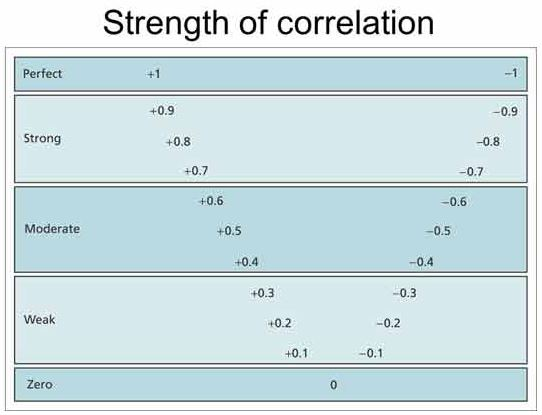

### Correlation Matrix

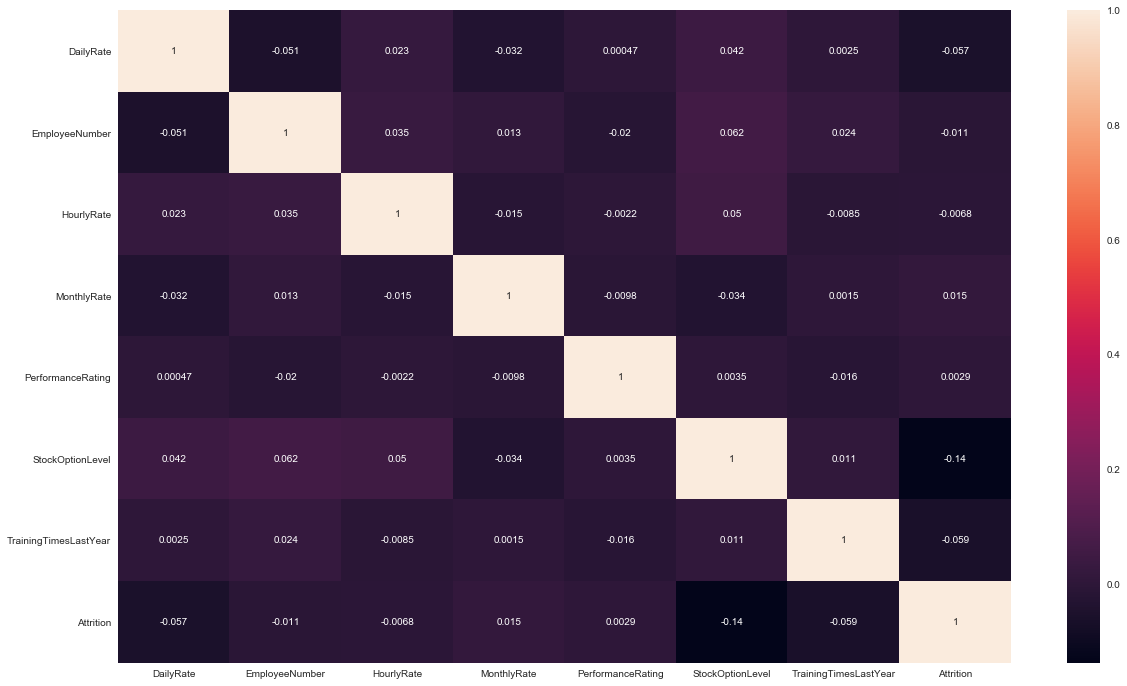

In [99]:
corr_matrix = df2.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix, vmax=1, annot=True)

Based on the fact which is given strength of correlation chart, we can identify the features which have strong, moderate, weak and zero correlations between each other. I will just outline the strong and moderate correlations here. 

**Features which have strong correlations:**

Percent Salary Hike and Performance Rating,

Total Working Years, Monthly Income and Job Level,

Years at Company, Years with Current Manager, and Years in Current Role, 

**Features which have moderate correlations:**

Age has moderate correlation with Total Working Years, Monthly Income, and Job Level,

Job Level has moderate correlation with Years at Company and Age,

Total Working Years has moderate correlation with Years with Current Manager, Years Since Last Promotion, Years in Current Role, Years at Company, and Age,

Years at Company has moderate correlation with Years Since Last Promotion, Total Working Years, Monthly Income, Job Level,

Years in Current Role has moderate correlation with Years Since Last Promotion, Total Working Years, 

Years Since Last Promotion has moderate correlation with Years with Current Manager, Years in Current Role, Years at Company, Total Working Years, 

Years with Current Manager has moderate correlation with Years Since Last Promotion, Total Working Years.

---
Generally, for the training model, we don't select features that have a strong correlation because it will have multicollinearity problem. Heatmap is a good way to detect this kind of situation. In this case, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearWithCurrManager have strong correlations with each other which we should keep in our mind in further steps. Besides, that does not mean that is always case. We should try each variable and select the features which will give the best results in the model. 

## Hypothesis Testing (Examining Attrition in Gender throughout the company)

### 1. Selecting appropriate test

In [38]:
# Gender & Attrition Table
table_df(x = 'Gender')

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


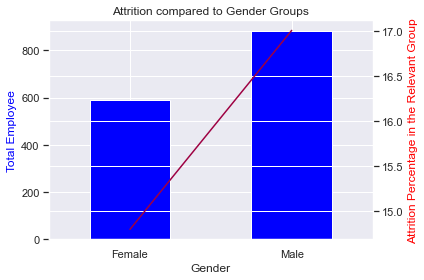

In [39]:
# Attrition compared to Gender Graph
graph_df(x = 'Gender')

Since the rate of attrition for two groups is compared, a two-proportion z-test is appropriate. Central Limit Theorem (CLT) states that regardless of the population, the distribution of sample averages tends to be normal. This holds for sample sizes greater than or equal to 30. Since the size of the data is big enough and 'female' and 'male' attrition  randomly to the resumes when presented to the employer, CLT could be applied here assuming that samples are respresentative of the population.

### 2. The Frequentist Statistical Approach 

In [40]:
# Assign female and  male into variables
female = df2[df2['Gender'] == 'Female']
male = df2[df2['Gender'] == 'Male']

# Find the mean for female and male employees attrition
female_attrition_mean = female['Attrition'].mean()
male_attrition_mean = male['Attrition'].mean()
print ('Female attrition mean: {}'.format(female_attrition_mean))
print ('Male attrition mean: {}'.format(male_attrition_mean))

# Find the difference of female and male employees attrition
diff_mean = male_attrition_mean - female_attrition_mean
print ('Difference of mean between male and female employees attrition: {}'.format(diff_mean))

Female attrition mean: 0.14795918367346939
Male attrition mean: 0.17006802721088435
Difference of mean between male and female employees attrition: 0.022108843537414963


**z-score**

In [41]:
# Compute z-score
male_attrition = np.sum(male['Attrition'])
female_attrition = np.sum(female['Attrition'])
male_ln = len(male)
female_ln = len(female)            
phat = (male_attrition + female_attrition) / (male_ln + female_ln)
z = (diff_mean) / np.sqrt(phat * (1 - phat) * (( 1/ float(male_ln)) + (1/float(female_ln))))
print ('z score:{}'.format(z))

z score:1.1292547809155016


**p-value**

In [42]:
# Compute p-value
p = stats.norm.cdf(-z)*2
print ('p-value:{}'.format(p))

p-value:0.2587903704911598


**Margin of error**

In [43]:
# Compute margin of error
moe = 1.96 * np.sqrt(phat * (1 - phat) * (( 1/ float(male_ln)) + (1/float(female_ln))))
print("Margin of Error: {}".format(moe))

Margin of Error: 0.03837338930564671


**Confidence Interval**

In [44]:
# Compute confidence interval
ci = diff_mean + np.array([-1, 1]) * moe
print("Confidence interval: {}".format(ci))

Confidence interval: [-0.01626455  0.06048223]


**Conclusion:**

The p-value is above the significance level (0.05). So, I fail to reject the null hypothesis. We can conclude that there is no enough evidence to reject the assumption of no difference in the proportion of attrition for male and female employees in the company. 

# Machine Learning

In [124]:
# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from scipy.stats import randint
from IPython.display import Image
from sklearn.model_selection import train_test_split

# Model selection
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer

# Import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression(random_state = 6)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 6)
dt = DecisionTreeClassifier(random_state = 6)
mlp = MLPClassifier(random_state = 6)

## 1. Feature Engineering and Selection

We have explored the trends and relationships within the data, now we can work on engineering a set of features for our models. We can also use the results of the EDA to inform this feature engineering. For this particular dataset, we have two main things to do before running a model:
- Decide what features we should keep.
- Transform categorical data into numerical.

**a. Decide what features we should keep.**

 In particular, we learned the following from EDA which can help us in engineering/selecting features:
 
'EmployeeNumber' is evidently irrelevant features, so we can remove them. Also, the 'PerformanceRating' had no effect on attrition. As we noticed before, all employees were graded as either 3 or 4. In this analysis we noticed that turnover was practically the same in both cases. 

We can drop some highly correlated features as they add redundancy to the model but since the corelation is very less in general let us keep all the features for now. In case of highly corelated features we can use something like Principal Component Analysis(PCA) to reduce our feature space. We could probably find many other columns to drop, but we can do that later by analyzing the results from our first ML model.

In [47]:
df2.drop(['EmployeeNumber', 'PerformanceRating'], axis = 1, inplace = True)

**b. Transform categorical data into numerical.**

The categorical data must be converted into numbers for the Machine Learning model to work. This can be done through sklearn (label encoding and one hot encoding) or pandas. We will use sklearn approach in this particular case. In our dataset, we will transform textual columns which are 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', and 'Overtime' into a numeric continuous one. 

In [48]:
# Extract categorical features from dataset
cat_df = df2.select_dtypes(include='category')
cat_df.columns

Index(['Age', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [49]:
# Extract categorical features from dataset
num_df = df2.select_dtypes(include='int64')
num_df.columns

Index(['DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

With that information, we can now encode the categorical data into a binary representation. 

### OneHot Encoder

In [50]:
# One hot encode categorical dataframe
features_categorical = pd.get_dummies(cat_df, drop_first=True)
features_categorical.head()

,Age_(22-25),Age_(26-35),Age_(36-60),BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,0,1,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0,0,1,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,0,0,1,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [51]:
# concatenate the features
df3 = pd.concat([num_df, features_categorical], axis=1)
df3.head()

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1102,1,2,2,94,3,2,4,5993,19479,...,0,0,0,0,0,1,0,0,1,1
1,279,8,1,3,61,2,2,2,5130,24907,...,0,0,0,0,1,0,0,1,0,0
2,1373,2,2,4,92,2,1,3,2090,2396,...,1,0,0,0,0,0,0,0,1,1
3,1392,3,4,4,56,3,1,3,2909,23159,...,0,0,0,0,1,0,0,1,0,1
4,591,2,1,1,40,3,1,2,3468,16632,...,1,0,0,0,0,0,0,1,0,0


In [53]:
# Moving Response Variable to the last column
response = df3['Attrition']
df3 = df3.drop(labels=['Attrition'], axis=1)
df3.insert(45,'Attrition',response)
df3.head()

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition
0,1102,1,2,2,94,3,2,4,5993,19479,...,0,0,0,0,1,0,0,1,1,1
1,279,8,1,3,61,2,2,2,5130,24907,...,0,0,0,1,0,0,1,0,0,0
2,1373,2,2,4,92,2,1,3,2090,2396,...,0,0,0,0,0,0,0,1,1,1
3,1392,3,4,4,56,3,1,3,2909,23159,...,0,0,0,1,0,0,1,0,1,0
4,591,2,1,1,40,3,1,2,3468,16632,...,0,0,0,0,0,0,1,0,0,0


## 2. Data Preprocessing

**Separate response variable and features**

In [58]:
X = df3.iloc[:, :-1].values   
y = df3.iloc[:, 45].values  

**Splitting the dataset into the Training set and Test set**

The data should be divided into train and test data. We will use train_test_split feature to divide the data and we will be using testing set of 25% and a training set of 75% of the data. We can set the random state of the split to ensure consistent results.

In [78]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 0)

**Feature Scaling**

The scikit library provides various types of scalers including MinMax Scaler and the StandardScaler. Below we will use the StandardScaler to scale the data.

In [60]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**Handling imbalanced dataset**

We have a imbalanced dataset with majority of observations being of one type ('No' which is '0' in the dataset) in our case. We have about 84 % of observations having 'No' and only 16 % of 'Yes' and hence this is an imbalanced dataset. To deal with such a imbalanced dataset we have to take certain measures, otherwise the performance of our model can be significantly affected. We have two approaches to curb such datasets: oversampling, which increase the number of observations corresponding to the minority class, or undersampling which decrease the number of observations for the majority class. Below I have used an oversampling technique known as the SMOTE(Synthetic Minority Oversampling Technique) which randomly creates some 'Synthetic' instances of the minority class so that the net observations of both the class get balanced out. 

In [ ]:
sm = SMOTE(random_state = 0)
X_train_sm,  y_train_sm = sm.fit_sample(X_train, y_train)

**Principal Component Analysis**

In [36]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.12486093, 0.08121904, 0.04855005, 0.04613273, 0.03961162,
       0.03781586, 0.03185218, 0.0306271 , 0.02865843, 0.02813661,
       0.02742027, 0.02712749, 0.02659827, 0.02583372, 0.02566171,
       0.02482174, 0.02448455, 0.02352107, 0.02310324, 0.02258035,
       0.0221166 , 0.02114342, 0.02109791, 0.02042161, 0.02010452,
       0.01963182, 0.01853432, 0.01744071, 0.0169279 , 0.01550109,
       0.01279423, 0.01122948, 0.00690292, 0.0061173 , 0.00507762,
       0.00460703, 0.00389549, 0.00318763, 0.00226448, 0.00083839,
       0.00073865, 0.00058753, 0.00022239])

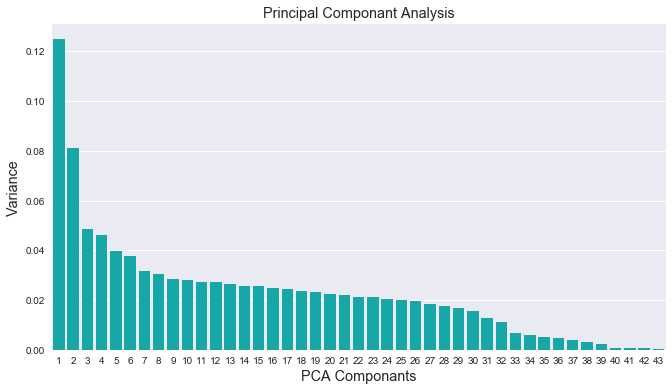

In [37]:
df_pca = pd.DataFrame({'var':explained_variance,
             'PC':list(range(1,44))})
fig = plt.figure(figsize=(11,6))
fig=sns.barplot(x = 'PC', y = "var", data = df_pca, color = "c")
plt.xlabel('PCA Componants', fontsize = 'x-large')
plt.ylabel('Variance', fontsize = 'x-large')
plt.title('Principal Componant Analysis', fontsize = 'x-large')
plt.show()

We don't see any sharp drop off in the percentage of variance explained from this screen plot, suggesting no natural cut off point in keeping certain dimensions and discarding others. Since the number of the components is not small and the linear relationships among them are not strong, it is hard to interpret the principal components.

In [38]:
df_cumus = pd.DataFrame({'total_var':np.cumsum(df_pca['var'].values)})
df_cumus

,total_var
0,0.124861
1,0.206080
2,0.254630
3,0.300763
4,0.340374
5,0.378190
6,0.410042
7,0.440669
8,0.469328
9,0.497465


This cumulative components scores shows that if we want to be able to explain more than 90% of the variation, we need to get at least 27 features in our model.

## 3. Selecting the Right Evaluation Metric

As the data imbalance is emphasized above, the evaluation of the classifier performance must be carried out using adequate metrics in order to take into account the class distribution and to pay more attention to the minority class. When the positive class is smaller and the ability to detect correctly positive samples is our main focus (correct detection of negatives examples is less important to the problem) we should use precision and recall. For our particular case, based on this thought I will use f1 score which is harmonic average of precision and recall as my evaluation metric.

## 4. Applying Machine Learning Algorithms

Since we must predict a binary class, we will be using classification models for training & predicting Employee Attrition. We need to keep in mind that our focus should be to have a better accuracy of predicting attrition i.e. Attrition = 1 which in confusion matrix will be "True Positive". However, we should not forget the prediction accuracy of not qualifying for attrition i.e. Attrition = 0 which will be "True Negative" in confusion matrix.

In this section; Logistic Regression, Decision Tree Classification, Random Forest Classification, K-NN Classification, Support Vector Machine (SVM) Classification, Kernel Support Vector Machine (SVM) Classification, Naïve Bayes Classification, Gradient Boosting Classification, and ADA Boost Classification algorithms are applied to the dataset. 

I will apply these algorithms into all features available and also features which explain the 90% of total importance via PCA. I will also try to improve model accuracy via hyperparameter tuning. I have coded four functions to apply to the models throughout this section. 

## Model Building

In [79]:
# naive approach on each models without hyperparameter tuning
model_list = [lr,knn,rf,dt,mlp]
score_res = []
for model in model_list:
    draft = model_selection.cross_val_score(model, X_train, y_train, cv = 5)
    score_res.append(draft)

In [80]:
# print out naive approach performance
model_names = ['Logistic Regression', 'KNN', 'Random Forest','Decision Tree','Neural Network']
idx = ['cv_1','cv_2','cv_3','cv_4','cv_5']
df_accuracy = pd.DataFrame(np.array(score_res).T, columns = model_names, index = idx).round(decimals=3)
print('='*60)
print('The Score is listed below \n\n',df_accuracy)
print('='*60)

The Score is listed below 

       Logistic Regression    KNN  Random Forest  Decision Tree  Neural Network
cv_1                0.846  0.796          0.846          0.783           0.833
cv_2                0.837  0.805          0.855          0.756           0.819
cv_3                0.841  0.832          0.850          0.741           0.814
cv_4                0.827  0.841          0.845          0.805           0.850
cv_5                0.836  0.782          0.859          0.795           0.809


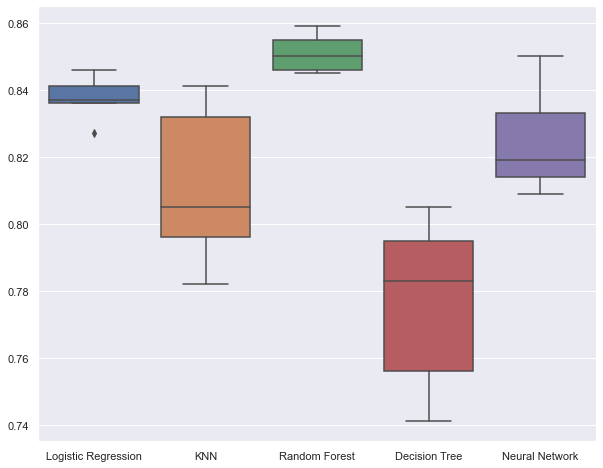

In [81]:
# visualize the performance of different machine learning models
plt.figure(figsize=(10, 8))
sns.boxplot(data = df_accuracy)
plt.savefig('draft.png');

In [82]:
# helper function to get best parameters from best model after grid search cross validation
best_models = []
def get_grid_res(gs):
    print("Best Score:", "{:.3f}".format(gs.best_score_))
    print("Best Parameters:")
    best_params = gs.best_params_
    for k, v in best_params.items():
        print(k, ":", v)

In [89]:
# set kfold number for k fold cross validation method
kfold = model_selection.KFold(n_splits=10)

# Logistic Regression

In [90]:
# hyperparameter tuning for logistic regression
lr_params = {'penalty':('l1', 'l2'), 
          'C':(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10)}

In [91]:
# apply grid search on each hyperparameter and fit in with data
grid_lr = GridSearchCV(lr, lr_params, cv= kfold)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=6),
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10),
                         'penalty': ('l1', 'l2')})

In [92]:
lr_res = grid_lr.cv_results_

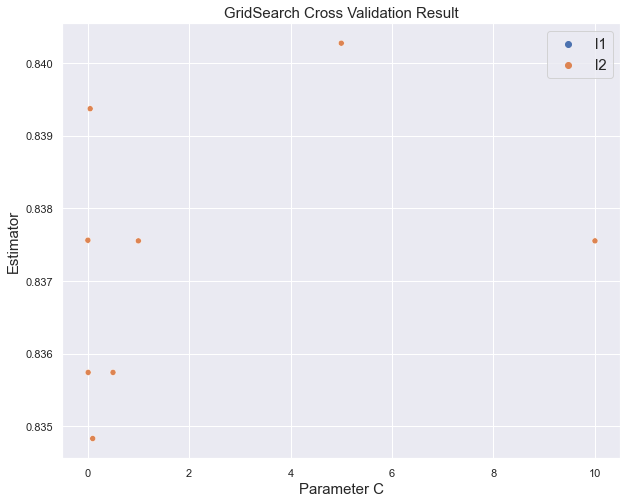

In [93]:
# visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'param_C', y = 'mean_test_score',hue = 'param_penalty',data = lr_res)
plt.xlabel('Parameter C',fontsize = 15)
plt.ylabel('Estimator',fontsize = 15)
plt.title('GridSearch Cross Validation Result',fontsize = 15)
plt.legend(fontsize = 15)
plt.savefig('LR.png');

In [94]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_lr)

Best Score: 0.840
Best Parameters:
C : 5
penalty : l2


In [95]:
best_lr_model = grid_lr.best_estimator_

In [96]:
# append the best model to the list for other evalution
best_models.append(('Logistic Regression', best_lr_model))

## Knn

In [97]:
# hyperparameter tuning for K nearest neighbors
knn_params = {
    'n_neighbors':[3,5,7,9,11,13,15,17,21,31,59,61,63] 
}

In [98]:
# apply grid search on each hyperparameter and fit in with data
grid_knn = GridSearchCV(knn, knn_params, cv= kfold)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 21, 31, 59,
                                         61, 63]})

In [99]:
knn_res = grid_knn.cv_results_

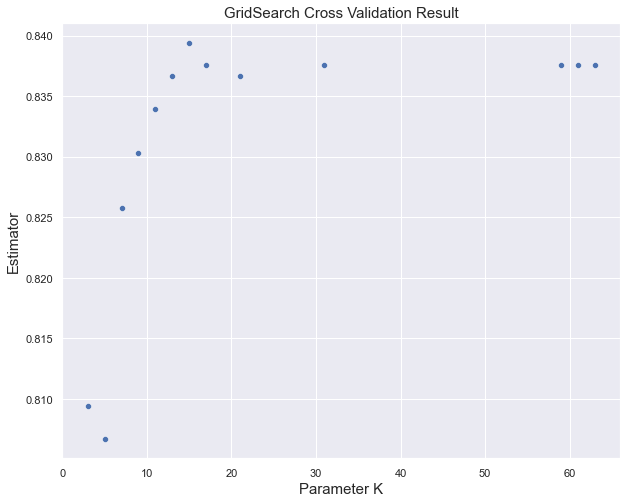

In [100]:
# visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'param_n_neighbors', y = 'mean_test_score',data = knn_res)
plt.xlabel('Parameter K',fontsize = 15)
plt.ylabel('Estimator',fontsize = 15)
plt.title('GridSearch Cross Validation Result',fontsize = 15)
plt.savefig('knn.png');

In [101]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_knn)

Best Score: 0.839
Best Parameters:
n_neighbors : 15


In [102]:
best_knn_model = grid_knn.best_estimator_

In [103]:
# append the best model to the list for other evalution
best_models.append(('K Nearest Neighbors',best_knn_model))

# Random Forest

In [104]:
# hyperparameter tuning for random forest
params_rf = {
    'n_estimators': [20,40,60,80],
    'min_samples_split':[4,6,8],
    'max_depth': [1, 5, 10, 15],
    'max_features': ['sqrt', 'auto','log2']
}
grid_rf = GridSearchCV(rf,params_rf, cv=kfold)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=6),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [20, 40, 60, 80]})

In [105]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_rf)

Best Score: 0.858
Best Parameters:
max_depth : 15
max_features : sqrt
min_samples_split : 6
n_estimators : 60


In [106]:
rf_res = grid_rf.cv_results_

In [107]:
best_rf_model = grid_rf.best_estimator_

In [108]:
# append the best model to the list for other evalution
best_models.append(('Random Forest', best_rf_model))

# Decision Tree

In [109]:
# hyperparameter tuning for decision tree
params_dt = {
    'max_depth':[1,5,10,15],
    'min_samples_split':[2,4,6,8,10]
}
grid_dt = GridSearchCV(dt,params_dt, cv=kfold)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=6),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [110]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_dt)

Best Score: 0.833
Best Parameters:
max_depth : 1
min_samples_split : 2


In [111]:
best_dt_model = grid_dt.best_estimator_

In [112]:
# append the best model to the list for other evalution
best_models.append(('Decision Tree', best_dt_model))

# Nueral Network

In [113]:
# hyperparameter tuning for multi layer perceptrons
params_mlp = {
    'hidden_layer_sizes': [(10,),(20,),(30,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.001, 0.01, 0.1]
}
grid_mlp = GridSearchCV(mlp,params_mlp, cv = kfold)
grid_mlp.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=MLPClassifier(random_state=6),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(10,), (20,), (30,)]})

In [114]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_mlp)

Best Score: 0.839
Best Parameters:
activation : tanh
alpha : 0.1
hidden_layer_sizes : (30,)


In [115]:
best_mlp_model = grid_mlp.best_estimator_

In [116]:
# append the best model to the list for other evalution
best_models.append(('Neural Network', best_mlp_model))

In [117]:
# print out the list of optimized models
for name,model in best_models:
    print(name)

Logistic Regression
K Nearest Neighbors
Random Forest
Decision Tree
Neural Network


In [118]:
# helper function to print out and visualize the evaluation result of each model including
# confusion matrix, precison-recall and f1 score
def plot_cm(models):
    sns.set_style('white')
    class_names = ['No','Yes']
    for model_name, model in models:
        cm = confusion_matrix(y_test,model.predict(X_test))
        tn = cm[0][0]
        fp = cm[0][1]
        fn = cm[1][0]
        tp = cm[1][1]
        accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
        precision = tp / (tp + fp + 0.0)
        recall = tp / (tp + fn + 0.0)
        f1 = 2 / (( 1 / precision) + ( 1 / recall))
        plot_confusion_matrix(model, X_test, y_test,
                              display_labels=class_names,
                              cmap="Oranges")
        plt.title(model_name, fontsize = 15)
        plt.ylabel('Actual',fontsize = 15)
        plt.xlabel('Predicted\nAccuracy = {}\nPrecision = {}\nRecell = {}\nF1 = {}'
                   .format((round(accuracy, 3)),round(precision, 3),round(recall, 3),round(f1, 3)), fontsize = 15)

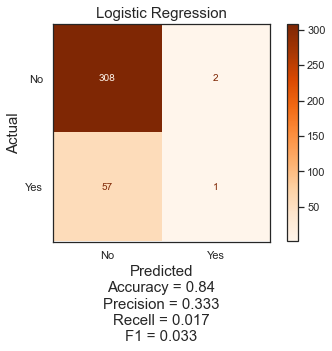

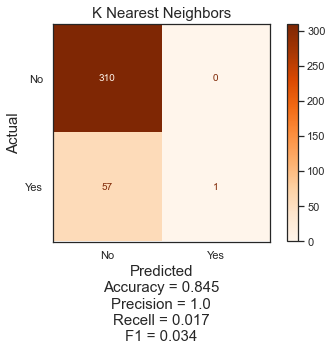

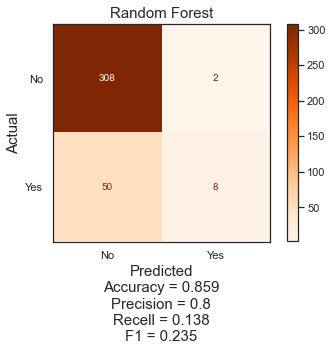

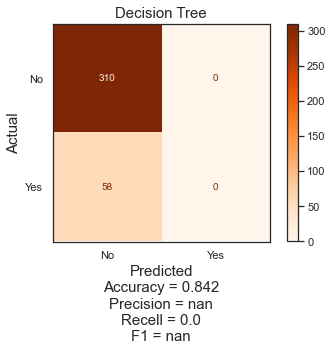

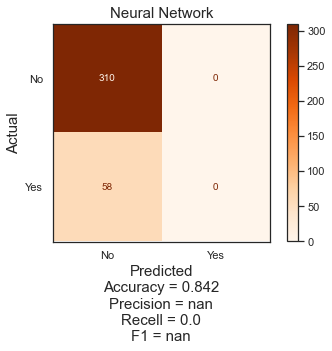

In [119]:
plot_cm(best_models)
plt.savefig('cm.png')

# Roc Curve

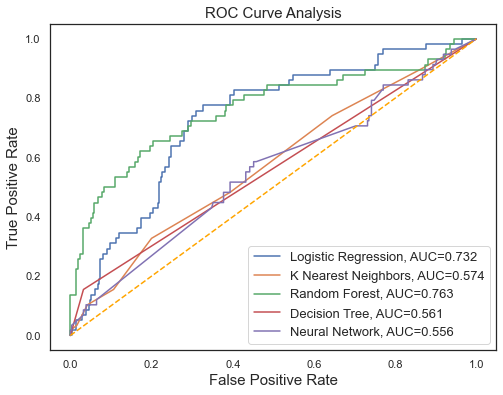

In [120]:
# visualize ROC curve for each optimized model
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for model_name, model in best_models:
        yproba = model.predict_proba(X_test)[::,1]

        fpr, tpr, _ = roc_curve(y_test,  yproba)
        auc = roc_auc_score(y_test, yproba)
        result_table = result_table.append({'classifiers':model_name,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)

    # Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis',fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig('ROC.png');

## 6. Conclusion

#### In the modeling Building section, we have seen the hyperparameter tuned Random Forest has the highest Best Score (0.85).

#### It can be clearly seen the feature engineering effects on each individual nine model in 'Comparison of ML Classifiers with Effects of Future Engineering' Roc Curve chart above. 


### Saving the Best Model

In [126]:
import pickle

In [128]:
# saving the Random Forest Model

filename = 'finalized_model.pickle'
pickle.dump(grid_rf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

### 6.2 - Recommendations

#### 1 28.3% of employees have over time work in the company and 30.5% of those employees leave the company. As it is also reflected in the model, employees working overtime are significantly more likely to resign. Therefore, the company should understand the reason why they are working overtime. Is it for too high workload or are employees' qualifications not enough to complete the scheduled tasks on time? Maybe there might be some other reasons behind that. Our recommendation will be to understand the reason(s) for overtime with detail research and take appropriate measures to reduce the factors behind this attrition factor. 

#### 2 21% of employees worked in 5 and more companies before this company and have 21.8% attrition. This is an area where HR should be aware of. HR should question the employee candidate why the employee quits the previous job and get in touch with previous company to have information about the applying employees. Besides that, the company should take precautionary measurements to keep their employees in their current role after they hire new employees. 

#### 3.If the year increases since the employees' last promotion, the attrition percentage also displays increase. Especially, 7 years since last promotion employee group (5.2%) has the highest attrition(21.1%) in its individual group. For that reason, the company review their promotion policy, and maybe define the company's expectations from their employees and make clear to all employees how and when they may be promoted. 

#### 4.Beside those factors above, there are some other indicators which keep employees in the company. These factors are stated below. 

 - Total working years in the company, 
 - Years in current role, 
 - Environment satisfaction, 
 - Medical education field, 
 - job satisfaction, 
 - Job involvement, 
 - Years with current manager, 
 - Work life balance, 
 - Age.
 
#### The company should primarily try to increase the effectiveness of those factors. As a result, it will yield to the decrease in the attrition rate. 